In [1]:
import numpy as np


# sigmoid function 0 ve 1 arasinda bir deyer alir hemishe, deriv=true tepe noqtesi 0 olan menfi ededlerdir /\
def sig(x):
  return 1 / (1 + np.exp(-x))
def deriv(x):
  return x * (1 - x)


# input dataset, in1,in2 + bias
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

# output dataset .T sertlerle sutunlarin yerini deyishir, burada bir setr yaradir sonra onu sutuna cevirir. Birbasha sutunda yaratmaq olar(array([[0], [0], [1], [1]]))
y = np.array([[0, 1, 1, 1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice), neticesi sadece null-dur
np.random.seed(1)

# initialize weights randomly with mean 0, -1 ve 1 arasinda 3 eded 1 setrli matrix generate edir( np.random.random((3, 1))- 0-1 arasinda olan matrix) 2-ye vurub 1 cixdiqda deyer -1 ve 1 arasinda alinir
syn0 = 2 * np.random.random((3, 1)) - 1

for iter in range(50000):
    # forward propagation l0 girish matrixdir, l1 cixish. l0 ve generate olunmush -1 ve 1 arasinda olan martixsi bir-birine vurur ve alinan deyerleri 0-1 arasina cevirir
    l0 = X
    l1 = sig(np.dot(l0, syn0))

    # how much did we miss? dogru cavabdan biz tesadufi aldigimiz deyerleri cixir ve bizim sehvmizini tapiriq
    l1_error = y - l1

    # multiply how much we missed by the
    # slope of the sigmoid at the values in l1, sehvin deltasini tapiriq
    l1_delta = l1_error * deriv(l1)

    # update weights, etdiyimiz sehv qeder dogruya yaxinlashiriq ve procedurur defelerle icra ederek dogruya yaxin netice almaga calishiriq
    syn0 += np.dot(l0.T, l1_delta)

print("Output After Training:")
print(syn0)

Output After Training:
[[10.32590447]
 [10.3259045 ]
 [-4.93178328]]


In [2]:
#print(syn0)
print(sig(dot(array([1, 1, 1]), syn0)))

NameError: name 'dot' is not defined

Sigmoid function:

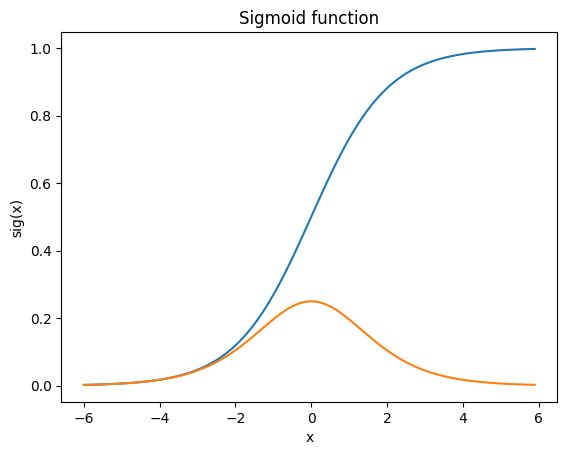

In [3]:
from numpy import exp, arange
import matplotlib.pyplot as plt

def sig(x): return 1 / (1 + exp(-x))
def deriv(x): return x * (1 - x)
xs = []
sigxs = []
derivxs = []
for iteration in arange(-6,6,0.1):
   xs.append(iteration)
   sigxs.append(sig(iteration))
   derivxs.append(deriv(sig(iteration)))

plt.plot(xs,sigxs)
plt.plot(xs,derivxs)
plt.ylabel('sig(x)')
plt.xlabel('x')
plt.title("Sigmoid function")
plt.show()

Logic gates test.
And gate:

In [4]:
from numpy import exp, array, random, dot
X = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = array([[0,0,0,1]]).T
random.seed(1)
syn0 = 2*random.random((3,1)) - 1
print("Rand sun0: ",syn0.T)
for iteration in range(1000):
    l1 = 1/(1+exp(-(dot(X,syn0))))
    syn0 += dot(X.T, (y - l1) * l1 * (1 - l1))
print("Last sun0: ",syn0.T)
print(1 / (1 + exp(-(dot(array([1, 1, 1]), syn0)))))

Rand sun0:  [[-0.16595599  0.44064899 -0.99977125]]
Last sun0:  [[ 5.4846283   5.48462831 -8.31961145]]
[0.93398912]


Logic gates detail test:

[0.09092344]


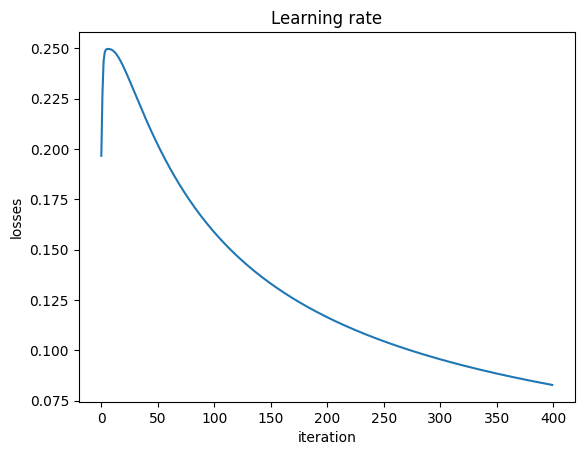

In [ ]:
from numpy import exp, array, random, dot
def sig(x): return 1 / (1 + exp(-x))
def deriv(x): return x * (1 - x)

X = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
#And
#y = array([[0,0,0,1]]).T
#OR
y = array([[0,1,1,1]]).T
#XOR
#y = array([[0,1,1,0]]).T
random.seed(1)
syn0 = 2*random.random((3,1)) - 1
#print("Rand sun0: ",syn0.T)

syns = []
its = []
losses = []
for iteration in range(400):
    l1 = sig(dot(X,syn0))
    syn0 += dot(X.T, (y - l1) * deriv(l1))
    #print("l1:",l1[0][0])
    #print("deriv l1:",deriv(l1))
    #print("Syn0: ",syn0)
    losses.append(deriv(l1)[0][0])
    syns.append(syn0[0][0])
    its.append(iteration)
#print("Last sun0: ",syn0.T)
print(1 / (1 + exp(-(dot(array([0, 0, 1]), syn0)))))

import matplotlib.pyplot as plt
#plt.plot(its,syns)
plt.plot(its,losses)
plt.ylabel('losses')
plt.xlabel('iteration')
plt.title("Learning rate")
plt.show()


Logic gates test XOR gate:

In [ ]:
from numpy import exp, array, random, dot
X = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = array([[0,1,1,0]]).T
random.seed(1)
syn0 = 2*random.random((3,4)) - 1
syn1 = 2*random.random((4,1)) - 1
print("Rand sun0: ",syn0.T)
print("Rand sun1: ",syn1.T)
for iteration in range(1000):
    l1 = 1/(1+exp(-(dot(X,syn0))))
    l2 = 1/(1+exp(-(dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
print("Last sun0: ",syn0.T)
print("Last sun1: ",syn1.T)
l1 = 1/(1+exp(-(dot(array([1, 0, 1]),syn0))))
l2 = 1/(1+exp(-(dot(l1,syn1))))
print(l2)

Rand sun0:  [[-0.16595599 -0.70648822 -0.20646505]
 [ 0.44064899 -0.81532281  0.07763347]
 [-0.99977125 -0.62747958 -0.16161097]
 [-0.39533485 -0.30887855  0.370439  ]]
Rand sun1:  [[-0.5910955   0.75623487 -0.94522481  0.34093502]]
Last sun0:  [[ 2.90150978 -0.74781061 -0.03595553]
 [ 2.96273163 -4.95036062 -1.41086537]
 [-5.61601575 -5.91729325  2.14548921]
 [-3.46066511 -2.19383462  4.01766136]]
Last sun1:  [[-4.3767207   5.12313514 -8.28341795  5.3391212 ]]
[0.96199055]


In [ ]:
from numpy import exp, array, random, dot
def sig(x): return 1 / (1 + exp(-x))
def deriv(x): return x * (1 - x)

X = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
#And
#y = array([[0,0,0,1]]).T
#OR
#y = array([[0,1,1,1]]).T
#XOR
y = array([[0,1,1,0]]).T
random.seed(1)
syn0 = 2*random.random((3,4)) - 1
syn1 = 2*random.random((4,1)) - 1
print("Rand sun0: ",syn0.T)
print("Rand sun1: ",syn1.T)
for iteration in range(1000):
    l1 = sig(dot(X,syn0))
    l2 = sig(dot(l1,syn1))
    l2_delta = (y - l2)*(deriv(l2))
    l1_delta = l2_delta.dot(syn1.T) * deriv(l1)
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
print("Last sun0: ",syn0.T)
print("Last sun1: ",syn1.T)
l1 = sig(dot(array([1, 1, 1]),syn0))
l2 = sig(dot(l1,syn1))
print(l2)

Rand sun0:  [[-0.16595599 -0.70648822 -0.20646505]
 [ 0.44064899 -0.81532281  0.07763347]
 [-0.99977125 -0.62747958 -0.16161097]
 [-0.39533485 -0.30887855  0.370439  ]]
Rand sun1:  [[-0.5910955   0.75623487 -0.94522481  0.34093502]]
Last sun0:  [[ 2.90150978 -0.74781061 -0.03595553]
 [ 2.96273163 -4.95036062 -1.41086537]
 [-5.61601575 -5.91729325  2.14548921]
 [-3.46066511 -2.19383462  4.01766136]]
Last sun1:  [[-4.3767207   5.12313514 -8.28341795  5.3391212 ]]
[0.05355476]
